# Verifiación de Etiquetado

In [ ]:
# Importación de librerías
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Agrega la raíz del proyecto al path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
# Configuración: rutas y parámetros
labels_csv = "../data/labels2_kmeans.csv"  # Asegúrate de que este archivo contenga la columna 'etiqueta_kmeans'
image_dir = "../data/images"
classes = ["saludable", "estres_leve", "enfermo"]
samples_per_class = 50

# Cargar el DataFrame con las etiquetas automáticas basadas en percentiles
df = pd.read_csv(labels_csv)

In [3]:
# Función para mostrar una cuadrícula de imágenes para una clase dada
def mostrar_imagenes_clase(cls, muestras, cols=10, figsize=(15, 8)):
    rows = int(np.ceil(len(muestras) / cols))
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.suptitle(f"Clase: {cls} (Ejemplos aleatorios)", fontsize=16)
    axes = axes.flatten()
    
    for ax, img_name in zip(axes, muestras):
        img_path = os.path.join(image_dir, img_name)
        try:
            img = Image.open(img_path).convert("RGB")
            ax.imshow(img)
            ax.axis("off")
        except Exception:
            ax.set_title("Error al cargar")
            ax.axis("off")
    
    # Ocultar ejes vacíos si sobran subplots
    for ax in axes[len(muestras):]:
        ax.axis("off")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

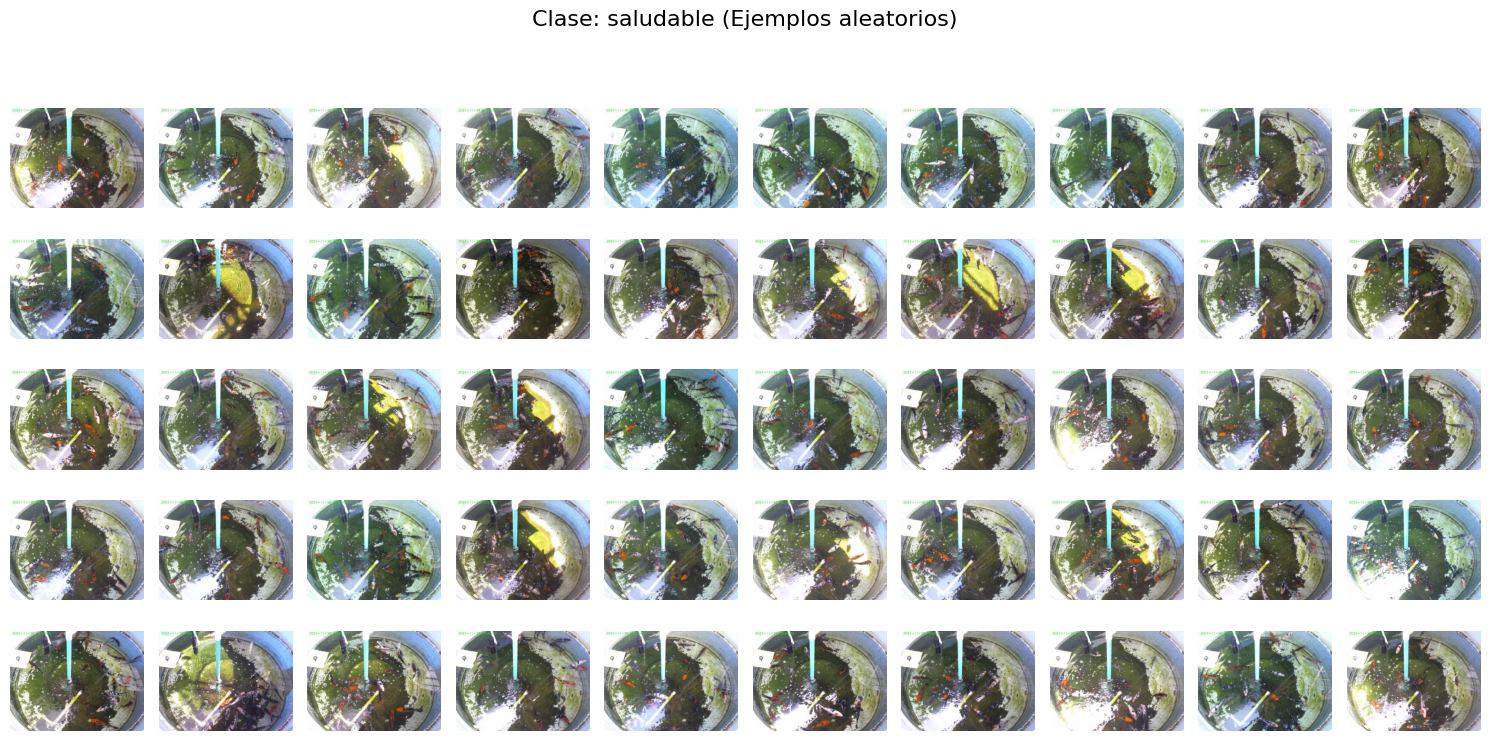

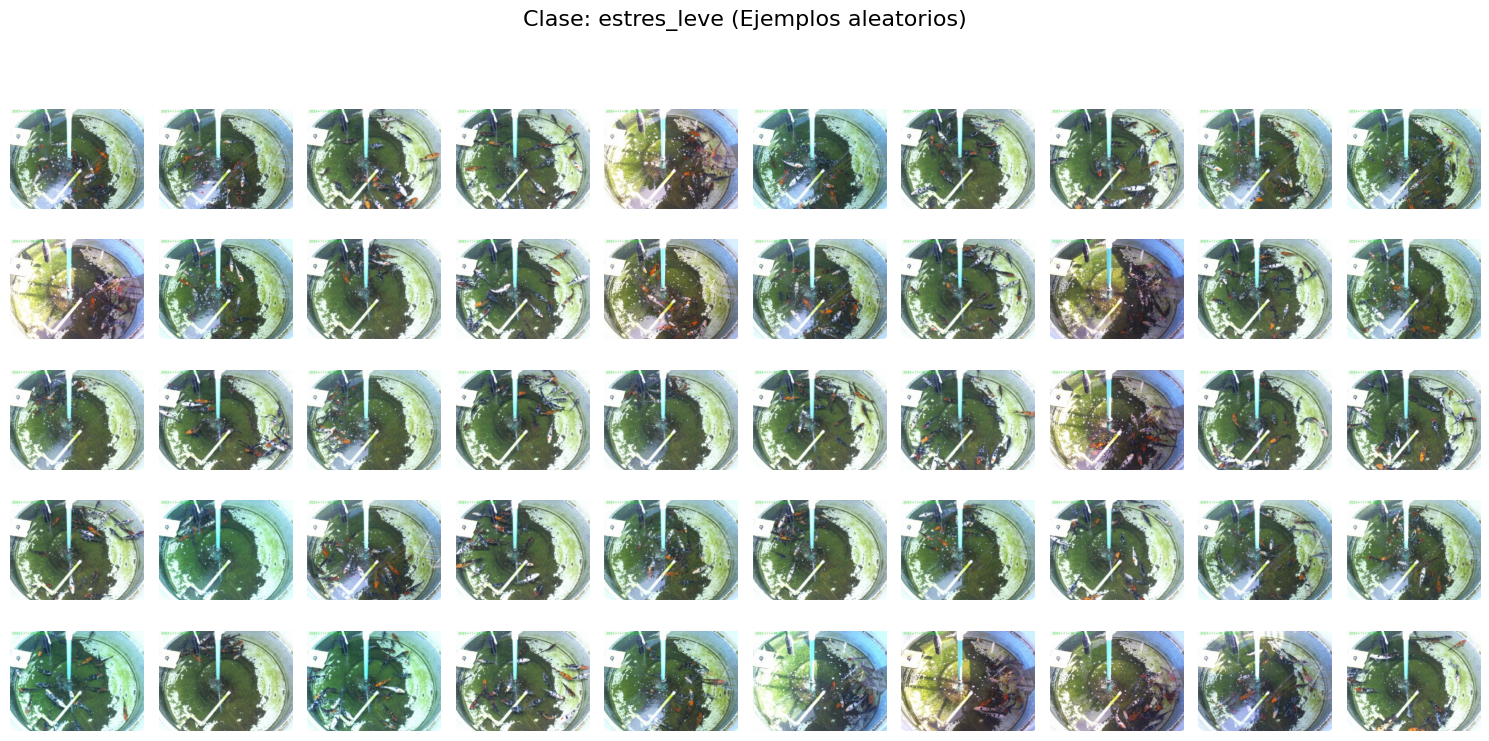

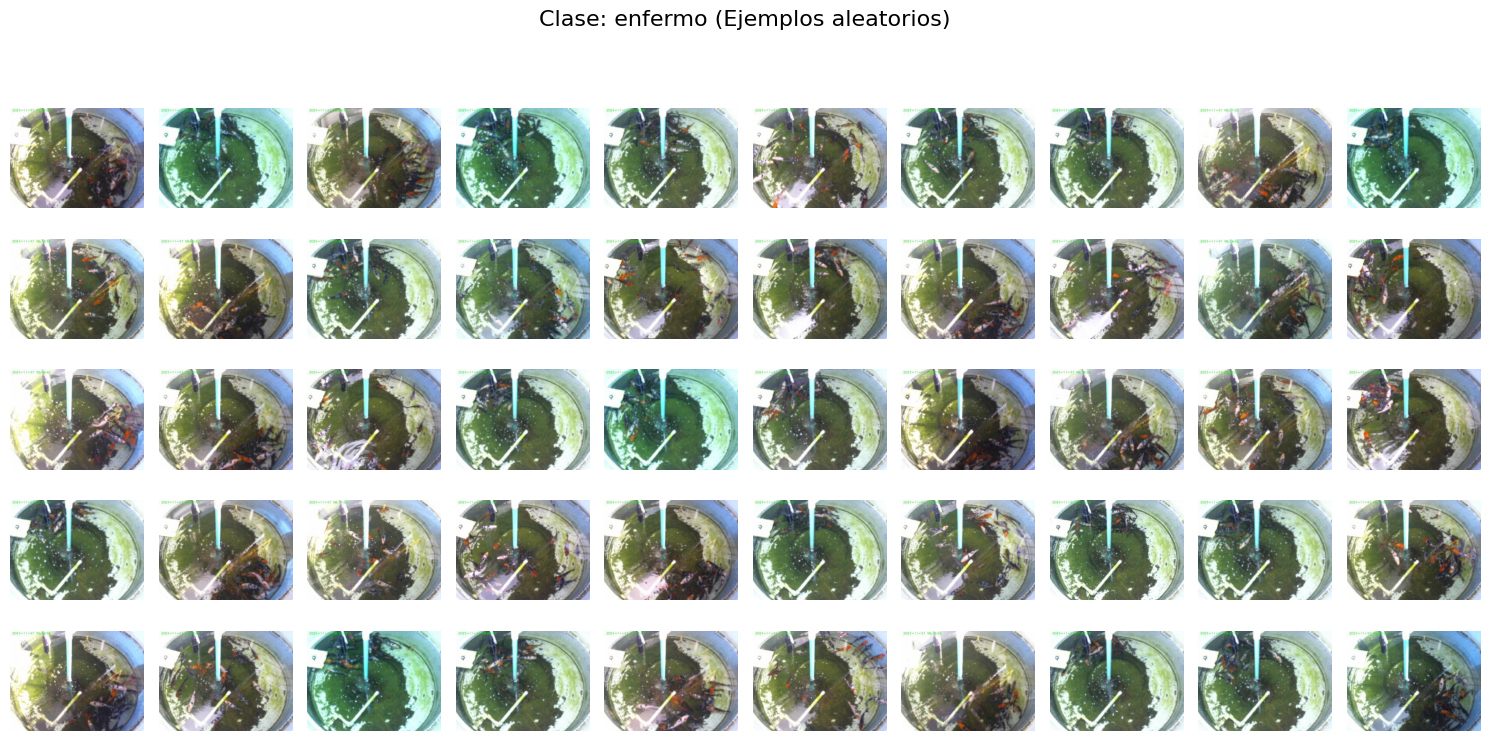

In [4]:
# Para cada clase, muestre 50 imágenes aleatorias
for cls in classes:
    df_cls = df[df["etiqueta_kmeans"] == cls]
    if len(df_cls) >= samples_per_class:
        muestras = df_cls["imagen"].sample(samples_per_class, random_state=42).tolist()
    else:
        muestras = df_cls["imagen"].tolist()
        print(f"Advertencia: Sólo se encontraron {len(df_cls)} imágenes para la clase '{cls}', menos de {samples_per_class}.")
    mostrar_imagenes_clase(cls, muestras)